# Tarea 3: Gráficas e Imágenes

**Esta tarea se entrega a más tardar el miércoles 1 de marzo a las 6pm!**

Equipo:

- Andrés Rashid Abdul Flores Niño
- José Ángel Ake Jimenez

## Problemas Básicos

En esta tarea incluirás algunas de las cosas de la tarea pasada. Para esto haz un archivo que se llame "ObjetosYFunciones_NombreDeCadaUnoEnElEquipo.jl" (poniendo el nombre de cada uno del equipo) y que incluya los objetos y funciones de la tarea pasada que ocuparás. Por ejemplo, los objetos Segmento, Polígono, etc, las funciones para generarlos, etc... El archivo lo puedes hacer en un notebook y después descargarlo como .jl, pero también lo puedes hacer con cualquier editor de texto básico (como nel block de notas) y guardarlo como un archivo .jl. 

Para cargar el archivo .jl, necesitas poner la siguiente función

In [ ]:
#Cargamos las paqueterías a usar
using Images, ImageView, ImageIO, Colors, Plots, LaTeXStrings, Statistics, StatsBase, LinearAlgebra

In [ ]:
include("funciones.jl")

**Notas:** 
- Les recomiendo que antes de entregar la tarea eliminen todas las líneas de código donde instalan paqueterías, e.g., `Pkg.add("PyPlot")`.
- Sus objetos `Segmento`, `LineaPoligonal`, etc. deberían ir en su archivo externo `funciones.jl`. 

En caso de que tu archivo esté en otra carpeta necesitas poner toda la dirección, aunque lo recomendable es que esté en la misma carpeta. 

[1] Importa Plots.plot y Plots.plot! para poder agregar un método para graficar tus objetos Segmento, LineaPoligonal, Poligono y SuperficiePoligonal. En el caso de plot(O::Objeto), debe de borrar lo que se haya graficado antes y generar la nueva gráfica del objeto. En el caso de plot!(O::Objeto), debe de graficar el objeto sobre lo que se haya graficado anteriormente. Prueba que tus métodos para sumar segmentos, lineas poligonales, etc, hacen lo que deberían. 

En el video no lo aclaré, pero pueden usar "..." para los kargs. Por ejemplo:     

En este caso, yo podré hacer plot(O, color = :red) y automáticamente reconocerá el color :red como una opción, o puedo hacer plot(O, alpha = 0.5) y me lo pondrá con transparencia 0.5. 

In [ ]:
import Plots: plot, plot!

function plot(s::Segmento; kargs...)
    plot([s.inicio[1],s.fin[1]],[s.inicio[2],s.fin[2]], label = ""; kargs...)
end
                                
function plot!(s::Segmento; kargs...)
    plot!([s.inicio[1],s.fin[1]],[s.inicio[2],s.fin[2]],label=""; kargs...)
end
                                    
function plot!(lp::LineaPoligonal; kargs...)
    for l in lp.lista_segmentos
        plot!(l; kargs...)
    end 
    return plot!()
end

function plot!(p::Poligono; kargs...)
    for l ∈ p.ls
        plot!(l; kargs...)
    end
    return plot!()
end

function plot!(sp::SuperficiePoligonal; kargs...)
    for l ∈ sp.lista_poligonos
        plot!(l; kargs...)
    end
    return plot!()
end

In [ ]:
p1 = Poligono([[0, 0], [2, 1], [1, 1], [0, 3]])
p2 = Poligono([[1, 1], [0, 3], [2, 4], [1.5, 2], [2, 1]])
s = SuperficiePoligonal([p1, p2], 0.)
plot()
plot!(s)

**3/5 pts (3/5 de 10)**

**Nota:** 
- Bien!
- Les faltó la línea `import Plots: plot, plot!` que es muy importante. 
- Les recomiendo que grafiquen todos los segmentos de un mismo objeto del mismo color. 

[2] Haz una función que dada un ángulo y rapidez inicial de una partícula, su posición inicial y una línea poligonal, genere una gráfica de la trayectoria parabólica (la constante de gravedad pre-fijada en $g = 9.81$) hasta que esta intersecte la línea poligonal y la línea poligonal. Si no se intersecta la linea poligonal en ningún momento debe arrojar un error. 

In [ ]:
mutable struct Parabola
    xᵢ::Vector
    θ::Number
    vᵢ::Number
end

function parabola(p::Parabola,t; g = 9.81)
    xᵢ,θ,vᵢ= p.xᵢ,p.θ,p.vᵢ
     v = vᵢ*[cos(θ), sin(θ)]
    y = xᵢ[2] + vᵢ[2]*t - 1/2 * g * t^2
    x = xᵢ[1] + vᵢ[1]*t
    return [x,y]
end

function intersección_recta(p::Parabola, s::Segmento; g = 9.81)
    xᵢ = p.xᵢ
    θ = p.θ
    vᵢ = p.vᵢ
    v = vᵢ*[cos(θ), sin(θ)]
    m = (s.inicio[2]-s.fin[2])/(s.inicio[1]-s.fin[1])
    b = s.fin[2]-m*s.fin[1]
    c = -2(xᵢ[2]-m*xᵢ[1] -b)/g 
    b1 = - (v[2]- m*v[1])/g
    t1,t2 = 0.,0.
    if b1^2 - c >= 0
        t1 = -b1 + sqrt(b1^2 - c)
        t2 = -b1 - sqrt(b1^2 - c)
    else
        t1 = Inf
        t2 = Inf
    end

    if t1 < 0 
        t1 = Inf
    end
    if t2 < 0
        t2 = Inf
    end
    return t1,t2
end

function intersección(p::Parabola, s::Segmento; g = 9.81)
    t1,t2 = intersección_recta(p, s, g = g)
    x1,x2 = [Inf,Inf], [Inf,Inf]
    if t1 < Inf && t2 < Inf
        t_min = min(t1, t2)
        t_max = max(t1, t2)
        x2 = parabola(p, t_max)
        x1 = parabola(p, t_min)
        test = dentro_de_un_segmento(x1, s)
        if test
            return x1, t_min
        end
        test = dentro_de_un_segmento(x2, s)
        if test
            return x2, t_max
        end
        return [Inf, Inf], Inf
    end
    if t1 < Inf
        x1 = parabola(p, t1)
        test = dentro_de_un_segmento(x1, s)
        if test
            return x1, t1
        end 
    end
    if t2 < Inf
        x2 = parabola(p, t2)
        test = dentro_de_un_segmento(x2, s)
        if test
            return x2, t2
        end
    end
    return [Inf, Inf], Inf      
end

function dibuja_parabola(p::Parabola, t, n; g = 9.81, kargs...)
    ts = 0:t/n:t
    parabolico(x) = parabola(p, x, g = g)
    x = parabolico.(ts)
    n = length(x)
    plot!([x[i][1] for i in 1:n], [x[i][2] for i in 1:n]; kargs...)
end

function encuentra_intersección(p::Parabola, lp::LineaPoligonal)
    tiempos = []
    posiciones = []
    for l in lp.ls
        x, t = intersección(p, l)
        if x[1] != Inf
            push!(tiempos, t)
            push!(posiciones, x)
        end
    end
    if length(tiempos) == 0
        return 0, 0
    end
    t, i = findmin(tiempos)
end

**3/5 pts (6/5 de 10)**

**Nota:** Les faltó la gráfica de la parábola intersectando a la línea poliigonal. 

[3] **Diagramas de Cobweb:** Estos diagramas consisten de el mapeo $f$ (función) que se va a estudiar, la recta identidad, el segmento $(x_0,0), (x_0,f(x_0))$, y de los segmentos de la forma $(x_i, x_{i+1}), (x_{i+1},x_{i+1})$ y los segmentos de la forma $(x_{i+1},x_{i+1}), (x_{i+1},x_{i+2})$. Haz una función que dado un mapeo $f(x)$, un valor inicial $x_0$ y un número de aplicaciones del mapeo, regrese el diagrama de Cobweb correspondiente. Pruébalo con el mapeo logístico para el caso donde hay un punto atractivo (que corresponde a la intersección de la parábola y la recta identidad), comenzando desde $x_0 = 0.3$. Pruébalo también para el caso donde haya 2 valores que sean cíclicos (o sea que $f(f(x_c)) = x_c$, pero $f(x_c)  \ne x_c$ ). 

¿Puedes encontrar un caso donde haya periodo 3?

In [2]:
using Plots

In [1]:
function pcobweb(f,x₀,n)
    x = x₀
    xs = Float64[x]
    ys = Float64[0]
    for i ∈ 1:n
        push!(xs,x)
        push!(ys,f(x))
        push!(xs,f(x))
        push!(ys,f(x))
        x = f(x)
    end
    return xs,ys
end

pcobweb (generic function with 1 method)

In [3]:
function gcobweb(f,x₀,a,b,n)
    plot(x -> x,a,b, label = "") 
    plot!(f,a,b, label = "")
    xs,ys = pcobweb(f,x₀,n)
    plot!(xs,ys,label = "")
end

gcobweb (generic function with 1 method)

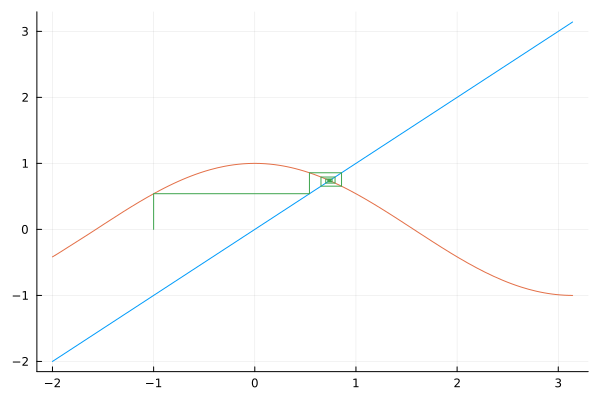

In [4]:
gcobweb(cos,-1,-2,π,10)

**3/5 pts (9/5 de 10)**

**Nota:** Muy bien! Les recomiendo hacer una animación del diagrama de cobweb conforme `x₀` se mueve entre `a` y `b`. 

[4] **Ley de Zipf:** Para este ejercicio primero necesitas revisar cómo abrir un archivo txt y leerlo (para evitar copiar a mano un texto). Para esto usa el archivo "100AñosDeSoledad.txt" que viene junto con esta tarea y prueba lo siguiente:

archivo = open("100AñosDeSoledad.txt") 

texto = read(archivo, String) 

close(archivo)

La primera parte abre el archivo, la segunda linea lee el archvio y pone el texto en la variable texto y la última linea cierra el archivo (para que se pueda usar en algo más).

La tarea consiste en contar cuantas veces aparece cada palabra (usando las funciones que hiciste en la tarea pasada) y con ello hacer un histograma de ese conteo que esté ordenado por la frecuencia con la que aparecen las palabras, es decir, la primera palabra es la que más veces se repite y la última palabra es la que menos veces aparece en el texto. 

La gráfica hazla en escala logarítimca tanto en el eje x, como en el eje y (nota que si tienes 0's en tu conteo tendrás problemas para graficar, porque log(0) = -Inf). Pon además etiquetas a los ejes, el eje x "palabras", el eje y el $\LaTeX$ "P". 

Además agrega a este histograma una ley de potencia (una curva de la forma $y(x) = a x^\lambda$) que aproxime como decae el histograma (haz el ajuste a "ojo"). Agrega en este caso la etiqueta $y(x) = a x^\lambda$ a esta curva (sin que haya una etiqueta para el histograma). 

In [ ]:
archivo = open("100AñosDeSoledad.txt")
texto = read(archivo, String)
close(archivo)

In [ ]:
function palacompu(x)
    ϕ = lowercase(x)
    θ = replace(ϕ, "á" => "a","é" => "e","í" => "i","ó" => "o","ú" => "u","ñ" => "gn","¿" => "","\"" => "","¡" => "","~" => "","-" => "","_" => "",":" => "","^" => "","*" => "","#" => "","\'" => "","%" => "","\$" => "","&" => "","/" => "","=" => "","@" => "","<" => "",">" => "","|" => "","°" => "","¬" => "","ü" => "","Á" => "A","É" => "E","Í" => "I","Ó" => "O","Ú" => "U","(" => "",")" => "","{" => "","}" => "","[" => "","]" => "","¡" => "","¿" => "","." => "","," => ";","+" => "","\n" => "")
    α = split(θ," ")
    β = unique(α)
    γ = sort!([(i,count(x -> i == x ,α)) for i ∈ β], by = x -> x[2])
    return first.(γ),last.(γ)
end

In [ ]:
#print(palacompu(texto))

In [ ]:
h = palacompu(texto)[2]

In [ ]:
scatter(log10.(1:length(h)),log10.(reverse(h)))
k(x,a,n) = a*(x^n)
σ = k.(Float64.(1:length(h)),10000,-1)
plot!(log10.(1:length(h)),log10.(σ))

**3/5 pts (12/5 de 10)**

**Nota:** Muy bien! ¿Qué pueden interpretar a partir de la gráfica acerca de la distribución de las palabras en un idioma?

[5] Algoritmo de la fotocopiadora (este ejercicio está un poco difícil aunque sea básico):  La idea de este ejercicio y el siguiente es crear las funciones que nos permitan hacer un fractal. Haz una función que tome como argumento una imagen cualquiera y una matriz de $2 \times 2$ que representa la transformación de la imange (que se conforma según SVD por 3 matrices de la forma $U D V_t$, donde $U$ y $V_t$ son matrices unitarias y $D$ es una matriz diagonal) y regrese una imagen que sea una copia transformada de la original. Supon tu imagen original centrada en el origen.  

Prueba tu función con una matriz de rotación, una de reflexión, una matriz diagonal positiva (que estire-contraiga los ejes $x$ y $y$) y una matriz que sea combinación de las 3 mencionadas antes. 

**Nota:** En el proceso de transformación los pixeles deben cambiar de forma. Ve cada pixel como un cuadrado de $1\times1$. Al aplicarle la transformación, el pixel pasará a ser un rombo. Cubre ese rombo con pixeles del mismo color y cuadrados de $1\times 1$ que estén en coordenadas enteras (o sea, pixeles normales). En este proceso de forma genérica, tendrás pixeles encimados. Puedes elegir cualquier función para elegir qué pixel conservas (por ejemplo, aleatoriamente). 

**Nota2:** Se vale usar cualquier paquetería, siempre y cuando se cumpla lo que se pide en el ejercicio.

In [ ]:
function rotacion(imagen,matriz_rotacion)
    coordenadas = [[i,j] for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    centro = [(1/2)*round(size(imagen,1)), (1/2)*round(size(imagen,2))] #Hallar el centro de la imagen para obtener nuevas coordenadas
    coordenadas = [coordenadas[i,j]-centro for i in 1:size(imagen,1), j in 1:size(imagen,2)]
        
    #coordenadas_transformadas = [matriz_rotacion*coordenadas[i,j] for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    #=
    valores_rojo = [Imagen[i,j].r for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    valores_verde = [Imagen[i,j].g for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    valores_azul = [Imagen[i,j].b for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    
    fondo = zeros(round(), floor(2*sqrt(2)*size(imagen,2))   
    
    valores_rojo = [valores_rojo[floor(coordenadas_transformadas[i][j]),floor(coordenadas_transformadas[i][j])] for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    valores_verde = [valores_verde[floor(coordenadas_transformadas[i][j]),floor(coordenadas_transformadas[i][j])]  for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    valores_azul = [valores_azul[floor(coordenadas_transformadas[i][j]),floor(coordenadas_transformadas[i][j])]  for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    =#
        
    #imagen_transformada = [RGB(valores_rojo[i,j],valores_verde[i,j],valores_azul[i,j]) for i in 1:s]
    return coordenadas
end

rotacion(monte_fuji, [0 -1; 1 0])
#rotacion(monte_fuji, [0 -1; 1 0])[1][2]

**0 pts (12/5 de 10)**

[6] Haz una función que dados un arreglo de matrices de $2\times 2$, un arreglo de traslaciones (vectores de 2 entradas enteras) y una imagen, regrese otra imagen que sea un collage de copias de la primera a las que se les aplicó las transformaciones dadas en el arreglo de matrices y después se trasladaron por los vectores dados en el arreglo de traslaciones. 

Prueba tu función con 3 transformaciones que reduzcan a un tercio el área de la imagen y que approximadamente mantengan la proporción de la imagen y traslaciones que coloquen a las 3 copias en los vértices de un triángulo de tal forma que las 3 imágenes se toquen, pero no se encimen.  Repite 4 o 5 veces el proceso para obtener con tu imagen un triángulo de Sierpinski. 

**0 pts (12/5 de 10)**

[7] Con la función que hiciste en el ejercicio anterior, produce diferentes fractales. En particular obtén un fractal de árbol, uno de helecho y uno formado por 3 transformaciones que corresponde a rotaciones y contracciones de tal forma que un cuadrado unitario lo transformen en 3 cuadrados que no se enciman y donde uno de sus lados es un lado de un triángulo (como la típica imagen para probar el teorema de pitágoras). 

**0 pts (12/5 de 10)**

[8] Un círculo es casi un polígono regular de $n$ lados si $n$ es grande. Visualmente, un polígono de 100 lados es más que suficiente para ver un círculo. Usando esto para hacer una función "plotcirculo!(x,r)" que grafique un círculo dada la posición $x$ y el radio $r$.  En tu función utiliza el argumento "..." para que puedas incluir color, grueso de línea, transparencia, rellenado, etc. Usa esta función para dibujar círculos en un arreglo triangular (en total 100 círculos), rellenos y con colores aleatorios (usando RGB). Luego repite lo anterior, pero esta vez con elipses (necesitarás ahora dar un eje mayor, eje menor, ángulo de inclinación y posición del centro). En el dibujo de las 100 elipses, pon los ángulos de giro aleatoriamente. 

**Nota:** En Julia se tiene como convención que si el nombre de la función termina con !, entonces se debe actualizar alguna variable global. En este caso, el ! significa se actualiza la gráfica, es decir, que se debe de graficar sobre una gráfica ya existente y no borrar la gráfica. 

In [ ]:
#Dividimos la función en 3 partes, la primera es para generar un 'circulo'
function genera_circulo(centro, radio; n_vertices=100,kwargs...)
    θ = 2*π/(n_vertices) #Angulo formado por los vertices del poligono
    puntos_x = [centro[1] + radio*cos(θ*i) for i in 0:n_vertices-1]
    puntos_y = [centro[2] + radio*sin(θ*i) for i in 0:n_vertices-1]
    plot(puntos_x, puntos_y; kwargs...)
end

function genera_circulo!(centro, radio; n_vertices=100,kwargs...)
    θ = 2*π/(n_vertices) #Angulo formado por los vertices del poligono
    puntos_x = [centro[1] + radio*cos(θ*i) for i in 0:n_vertices-1]
    puntos_y = [centro[2] + radio*sin(θ*i) for i in 0:n_vertices-1]
    plot!(puntos_x, puntos_y; kwargs...)
end

#

#Parte 2: Graficamos sucesivos círculos 

#Genera un elipse
function genera_elipse(centro,eje_mayor,eje_menor,ϕ=0;n_vertices=100,kwargs...)
    θ=2*π/n_vertices
    puntos_x = [centro[1]+(eje_mayor/2)*cos(θ*i)*cos(ϕ)-(eje_menor/2)*sin(ϕ)*sin(θ*i) for i in 0:n_vertices-1]
    puntos_y = [centro[2]+(eje_menor/2)*sin(θ*i)*cos(ϕ)+(eje_mayor/2)*cos(θ*i)*sin(ϕ) for i in 0:n_vertices-1] 
    plot(puntos_x,puntos_y;kwargs...)
end

function genera_elipse!(centro,eje_mayor,eje_menor,ϕ=0;n_vertices=100,kwargs...)
    θ=2*π/n_vertices
    puntos_x = [centro[1]+(eje_mayor/2)*cos(θ*i)*cos(ϕ)-(eje_menor/2)*sin(ϕ)*sin(θ*i) for i in 0:n_vertices-1]
    puntos_y = [centro[2]+(eje_menor/2)*sin(θ*i)*cos(ϕ)+(eje_mayor/2)*cos(θ*i)*sin(ϕ) for i in 0:n_vertices-1] 
    plot!(puntos_x,puntos_y;kwargs...)
end

#genera arreglo de circulos
function genera_arreglo_de_circulos(num_figuras,centro,radio, pilas_de_figuras; n_vertices=100)
    contador=0 
    bandera_centro = centro
    r,g,b = rand(Float16),rand(Float16),rand(Float16)
    genera_circulo(centro,radio,color=RGB(r,g,b),fill = (0, 0,RGB(r,g,b)))
    for i in 2:pilas_de_figuras
        contador+=i
        centro=[centro[1]+(2+0.05)*radio*cos(5*π/4), centro[2]+(2+0.1)*radio*sin(5*π/4)]
        r,g,b=rand(Float16),rand(Float16),rand(Float16)
        genera_circulo!(centro,radio,color=RGB(r,g,b),fill = (0, 0,RGB(r,g,b)))
        for i in 1:i-1
            bandera_centro=[centro[1]+(2+0.7)*i*radio, centro[2]]
            r,g,b = rand(Float16),rand(Float16),rand(Float16)
            genera_circulo!(bandera_centro,radio,color=RGB(r,g,b),leg = false, fill = (0, 0,RGB(r,g,b)),
                            aspect_ratio = 1)
        end
        if(contador>=num_figuras)
            #print(i,"*",j)
            break
        end
    end
    plot!()
end

genera_arreglo_de_circulos(100,[20,20],1,25)

In [ ]:
# genera arreglo de elipses

function genera_arreglo_de_elipses(num_figuras,centro,eje_mayor,eje_menor,tope;n_vertices=100)
    contador=0 
    bandera_centro = centro
    r,g,b,ϕ = rand(Float16),rand(Float16),rand(Float16), rand(Float16)
    genera_elipse(centro,eje_mayor,eje_menor,ϕ,color=RGB(r,g,b),fill = (0, 0,RGB(r,g,b)))
    for i in 2:tope
        contador+=i
        centro=[centro[1]+(eje_mayor+0.15)*cos(5*π/4), centro[2]+(eje_mayor+0.1)*sin(5*π/4)]
        r,g,b,ϕ=rand(Float16),rand(Float16),rand(Float16), rand(Float16)
        genera_elipse!(centro,eje_mayor,eje_menor,ϕ,color=RGB(r,g,b),fill = (0, 0,RGB(r,g,b)))
        for i in 1:i-1
            bandera_centro=[centro[1]+(0.5+eje_mayor)*i, centro[2]]
            r,g,b = rand(Float16),rand(Float16),rand(Float16)
            genera_elipse!(bandera_centro,eje_mayor,eje_menor,ϕ,color=RGB(r,g,b),fill = (0, 0,RGB(r,g,b)), leg = false,
                            aspect_ratio = 1)
        end
        if(contador>=num_figuras) 
            break
        end
    end
    plot!()
end

genera_arreglo_de_elipses(100,[25,25],1,0.5,25)

**3/5 pts (3 / 10)**

**Nota:** Muy bien! En este caso les recomiendo fijar el parámetro `aspect_ratio = 1` para que se vean bien sus círculos. 

[9] **Convoluciones:** Una de las ventajas de trabajar con imágenes en Julia (o cualquier lenguaje de programación), es que uno puede hacer funciones que apliquen automáticamente algún efecto que se quiera. Algunas de las transformaciones más útiles son algo que se conoce como convoluciones. Para hacer una convolución primero necesitamos generar una función para mezclar colores de un cuadrado de $(2n+1)\times (2n+1)$ pixeles (típicamente elegimos $n = 1$), que se le conoce como Kernel. Por ejemplo, digamos que queremos hacer un kernel que promedie colores. Para cada pixel (que es un objeto RGB), obtenemos la cantidad de rojo, verde y azul que tiene usando pixel[i,j].r, pixel[i,j].g y pixel[i,j].b, luego, en la nueva imágen tendremos que pixel_nueva_imagen[i,j] = RGB((pixel[i,j].r+pixel[i,j+1].r+pixel[i,j-1].r+...)/9, (pixel[i,j].g+pixel[i,j+1].g+pixel[i,j-1].g+...)/9, (pixel[i,j].b+pixel[i,j+1].b+pixel[i,j-1].b+...)/9). 

Aquí hay que notar que cuando i o j corresponden a la frontera, no existirán algunos de los vecinos. En ese caso se puede sustituir el vecino por un color fijo, por ejemplo negro o blanco. 

Haz una función para obtener la convolución usando la regla del promedio. Pruébalo con varias fotografías, ¿qué notas? es decir ¿qué es lo que parece que hace esta convolución?  

In [ ]:
#=
Primero definimos unas funciones de manera global que 
utilizaremos en este ejercicio y el siguiente
=#

function obtener_color(pixel,i,j,k,l,color) #Obtener el color de un pixel en específico
    if color == "rojo"
        return pixel[i+k,j+l].r #Obtenemos rojo
    elseif color == "azul"
        return pixel[i+k,j+l].b #Obtenemos azul
    elseif color == "verde"
        return pixel[i+k,j+l].g #Obtenemos verde
    else
        error("No permitido")
    end
end
    
function evaluar_pixel(pixel,i,j,k,l,color) #Vemos si el pixel se encuentra definido (i.e. si no está fuera de los bordes)
    if i+k<=0 || j+l<=0 || i+k> size(pixel,1) || j+l> size(pixel,2)
        return 0 #Si no es así, su valor es cero
    else
        return obtener_color(pixel,i,j,k,l,color) #En otro caso obtenemos el color
    end
end

function convolucion_box_blur(imagen,n=1) #Funcion de convolucion para box_blur
    
    function promedio_vecindad(pixel,i,j,color) #Obtiene los valores promedio de una vecindad de 3x3 dado un pixel
        valores = [mean([evaluar_pixel(pixel,i,j,k,l,color) for k in -n:n]) for l in -n:n]
        return mean(valores)
    end
    
    #Obtenemos los promedios por cada coordenada
    promedio_rojo = [promedio_vecindad(imagen,i,j,"rojo") for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    promedio_verde = [promedio_vecindad(imagen,i,j,"verde") for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    promedio_azul = [promedio_vecindad(imagen,i,j,"azul") for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    #Obtenemos la convolución con ayuda de los promedios y devolvemos
    convolucion = [RGB(promedio_rojo[i,j], promedio_verde[i,j], promedio_azul[i,j]) for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    return convolucion 
end

#Cargamos una imagen de ejemplo
#monte_fuji = load("monte_fuji.jpg")
using TestImages
monte_fuji = testimage("peppers_color.tif")
convolucion_box_blur(monte_fuji)

**3/5 pts (18/5 de 10)**

**Nota:**
- En vez de 
```julia
valores = [mean([evaluar_pixel(pixel,i,j,k,l,color) for k in -n:n]) for l in -n:n]
```
debería ser 
```julia
valores = sum([evaluar_pixel(pixel,i,j,k,l,color) for k in -n:n for l in -n:n])
```
- En vez de hacer cero las contribuciones fuera de la imagen lo mejor sería añadirle a la imagen un marco (negro o blanco) lo suficientemente grueso como para calcular los pixeles de la frontera. 
- Les faltó asegurarse de que los colores estén entre 0 y 1. 

[10] **Convoluciones-continuación:** Ahora haz una función que dado un Kernel (una matriz de $(2n+1)\times (2n+1)$ que dice cual es el peso de cada pixel vecino y el mismo pixel involucrado a la hora de sumar (o restar) colores), que obtenga la imágen convolucionada. 

prueba usando estos algunos de estos kernels: https://en.wikipedia.org/wiki/Kernel_(image_processing) sobre las imágenes de tu preferencia. 

**Nota:** En la lista de kernels de wikipedia vienen algunos donde pueden salir proporciones negativas de algún color. No tiene sentido $RGB(-1,0,0)$, así que la regla es: si algún color tiene más de 1, entonces se vuelve 1 y si tiene menos de 0, se vuelve 0. 

In [ ]:
#funcion para la convolucion de un pixel dado un kernel
function kernel_convolucion(pixel,kernel,x,y,n,color)
    #Obtiene la convolucion de una vecindad de (2n+1,2n+1) por color
    if color == "rojo"
        suma = sum([evaluar_pixel(pixel,x,y,i,j,"rojo")*kernel[n+1+i,n+1+j] for i in -n:n, j in -n:n])
    elseif color == "verde"
        suma = sum([evaluar_pixel(pixel,x,y,i,j,"verde")*kernel[n+1+i,n+1+j] for i in -n:n, j in -n:n])
    elseif color == "azul"
        suma = sum([evaluar_pixel(pixel,x,y,i,j,"azul")*kernel[n+1+i,n+1+j] for i in -n:n, j in -n:n])
    else
        error("No permitido")
    end
    
    #Evaluamos por casos la suma de la convolucion obtenida
    if suma < 0
        return 0
    elseif suma > 1
        return 1
    else 
        return suma 
    end 
end

function convolucion(imagen,kernel,n) #Funcion principal de convolucion, 'n' es la n del kernel (2n+1, 2n+1)
    
    #Obtenemos los colores convolucionados de cada pixel de la imagen
    rojo_convolucionado = [kernel_convolucion(imagen,kernel,i,j,n,"rojo") for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    azul_convolucionado = [kernel_convolucion(imagen,kernel,i,j,n,"verde") for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    verde_convolucionado = [kernel_convolucion(imagen,kernel,i,j,n,"azul") for i in 1:size(imagen,1), j in 1:size(imagen,2)]

    #Juntamos todos los colores convolucionados en una sola imagen para obtener la imagen convolucionada
    imagen_convolucionada = [RGB(rojo_convolucionado[i,j], verde_convolucionado[i,j],azul_convolucionado[i,j]) for i in 1:size(imagen,1), j in 1:size(imagen,2)]
    return imagen_convolucionada
end

In [ ]:
#Pruebas de nuestra convolucion
#kernel_ridge = [-1 -1 -1; -1 8 -1; -1 -1 -1]
#convolucion(monte_fuji,kernel_ridge,1)

#kernel_gaussian_blur_5x5 = (1/256)*[1 4 6 4 1; 4 16 24 16 4; 6 24 36 24 6; 4 16 24 16 4; 1 4 6 4 1]
#convolucion(monte_fuji,kernel_gaussian_blur_5x5,2)

#beavis_and_butthead = load("Beavis-and-Butthead.jpg")
convolucion(monte_fuji,kernel_gaussian_blur_5x5,2)

In [ ]:
convolucion(monte_fuji,kernel_ridge,1)

**3/5 pts (21/5 de 10)**

**Nota:** En este ejercicio corrigen dos de los comentarios que les hice en el ejercicio anterior. Sin embargo, les falta el marco (negro o blanco). Creo que esa es la razón por la cual su gaussian blurr en vez de devolver la imagen borrosa, cambia los colores. 

## Ejercicios avanzados

**Para sacar 7:** Partícula en una caja cuadrada

(i) Haz una función que dadas la posición y velocidad de una partícula en 2D, el lado de un cuadrado, el centro de ese cuadrado y el ángulo de inclinación del cuadrado, encuentre dónde colisionará primero la partícula con el cuadrado (si no colisiona con ninguna cara, entonces regresa (Inf, Inf)).

(ii) Haz otra función que "refleje" la velocidad de la partícula al colicionar con la cara del cuadrado siguiendo la ley de Snell.

(iii) Finalmente haz una animación  de una partícula rebotando dentro de una caja cuadrada de lado 1 rotada un ángulo  𝜋/5 , con velocidad inicial  (1,0)  y posición inicial  (0,0). Esta parte no es trivial, pues debes de poner pasos de tiempo fijos (y pequeños). Es decir, en cada paso de tiempo tienes que avanzar la partícula $\vec{v}\cdot dt$ si no hay colisión y si hay colisión debes de hacerlo en 2 pasos, avanzar la partícula hasta que hay la colisión un tiempo $dt'$ y después avanzarla el tiempo $dt-dt'$ ya con la nueva velocidad. En la animación asegúrate de dibujar la trayectoria de la partícula (para esto puedes usar tus objetos Segmento). 


In [ ]:
function colision_cuadrado(pos, vel, lado_cuadrado, centro_cuadrado, angulo_inclinacion)
    
    return posicion_colision
end


**Para sacar 8** En este problema necesitarás instalar la paquetería <a href=" https://juliaimages.org/v0.21/imagesegmentation/">ImageSegmentation</a>. Instala la paquetería si aún no la tienes y cárgala. 

El propósito es que obtengas una forma de obtener la posición y área de objetos automáticamente. Para hacer las cosas simples, nos restringiremos a fotos de objetos en una hoja de papel blanco (para que el contraste sea mayor). Tienes que hacer una función que dada una foto y algunos parámetros de "búsqueda", encuentre todos los objetos de la foto, su posición y el número de pixeles (equivalente al área). 

Para entender como hacer esto vamos a revisar el ejemplo de las monedas de la paquetería ImagesSegmentation: 

using Random
function get_random_color(seed)
    Random.seed!(seed)
    rand(RGB{N0f8})
end

1. using Images, ImageSegmentation
2. img = load(download("http://docs.opencv.org/3.1.0/water_coins.jpg"));
3. bw = Gray.(img) .> 0.5;
4. dist = 1 .- distance_transform(feature_transform(bw));
5. markers = label_components(dist .< -15);
6. segments = watershed(dist, markers)
7. map(i->get_random_color(i), labels_map(segments)) .* (1 .-bw)


La función get_random_color(seed), sólo genera un color aleatoriamente para cada número que se de, pero siempre el mismo color para un mismo número. Se podría cambiar por una lista de colores y ya. El resto del código lo explico a continuación:

En la primera línea se cargan las paqueterías, la segunda es para cargar la imágen (puedes aquí cargar una imagen propia). En la tercera línea se hace una matriz de "true" y "false", dependiendo de si la escala en grises es mayor o menor que 0.5 para cada pixel. Aquí puedes cambiar el 0.5 por otra cantidad. Es uno de los parámetros de identificación. 

La línea 4 es un poco más complicada, pero lo importante es que obtiene la transformada de la distancia, lo cual podemos entenderlo de la siguiente forma. Pensemos en la imagen como una hoja de papel con manchas que evitan que se prenda el papel en cierto grado. Si prendemos fuego desde las orillas del papel, la transformada de distancia nos diría en cada pixel cuánto tardó en quemarse desde que se prendió fuego a las orillas (si dibujas un heatmap de dist, verás esos "tiempos de quemado"). 

En la **línea 5** es la más importante, obtiene una matriz con números enteros. Cada elemento de la matriz corresponde a un pixel y cada número a qué objeto corresponde. Uno puede jugar un poco con ese -15 para ver qué objetos obtiene. 

La línea 6 se genera una segmentación de la imagen. Prueba heatmap(segments.image_indexmap) para que veas cómo se segmenta la imagen. Cómo lo hace, pues tiene que ver con la distancia que se calculó y reconocer que hay un fondo homogeneo. Entonces, digamos que cada marker emite alguna sustancia. Localiza dónde se encuentran las sustancias por primera vez y así segmenta la imagen. 

Finalmente la **línea 7** asigna un color aleatoria a cada segmento y después multiplica esto por 1-bw, que es una matriz con 0 si no tiene moneda y 1 si la tiene, de forma que el resultado una matriz de colores, negro si no tienen moneda y algún color aleatorio si sí tiene. 

Entonces, en el problema tienes que primero hacer una función para transformar las coordenadas de los elementos de una matriz en coordenadas en el espacio $x,y$. Es decir, que cada pixel tenga una coordenada. Luego, hacer una función que dados los dos parámetros (el 0.5 y el -15 en el ejemplo) genere una matriz de enteros donde se tenga 0 si no hay un objeto y un número que corresponda al marker si sí hay objeto. Luego, debes hacer otra función que dada una matriz de enteros $A$, obtenga la posición promedio de los elementos de $A$ que tienen como valor $n$ para cada valor $n$ de $A$. Esa función también debe arrojar el número de elementos de $A$ que tienen valor $n$. Es decir, la función debe arrojar 2 listas, una con las coordenadas de los $N$ objetos y otra con el número de pixeles de los $N$ objetos. Finalmente une todoo para hacer la función que se pide (dada la imagen y los dos parámetros obtener la posición y áreas de todos los objetos). 

Prueba tu función con una fotografía (que incluyas en la tarea) de varias monedas sobre una hoja de papel blanco. 



**Para sacar 9:** Hacer gráficas usando surface es latoso, porque gr, pyplot y plotly tienen diferentes formatos y ninguno es tan agradable. En particular, graficar un poliedro es latoso. Para superar esto se puede generar una función para hacer dibujos 3D desde los 2D (como de hecho se hace siempre) o bien, recurrir a otra paquetería. 

En este problema se trata de hacer una función para graficar un objeto Poliedro usando perspectiva. Debes agregar los metodos a plot y una plot! para graficar un poliedro, para lo cual tendrás que dar además una "posición de la cámara" y la "dirección de la cámara" (ver figura).  

Deberás hacer la proyección 2D del poliedro según la posición y dirección de la cámara, pero debes de considerar que los objetos se ven más pequeños si están más lejos de la cámara, es decir, la posición de los vértices se debe de modificar (sigue la idea de la figura).  

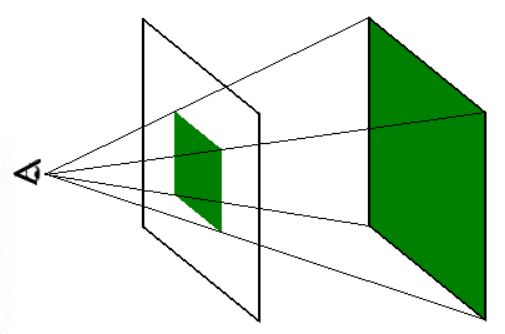

Prueba tus funciones dibujando varios cubos en posiciones (y giros) aleatorias. 

**Nota:** <a href="https://makie.juliaplots.org/stable/Makie">Makie</a> es en realidad la buena opción en estos casos. Es una paquetería más poderosa y más bonita que Plots y funciona muy bien para 3D, pero tiene varias dificultades (por las que no la incluí en este curso). Aún así los motivo a revisar la paquetería, sólo háganlo en un notebook aparte, pues es incompatible con Plots. Es decir, no es para esta tarea, es digamos, conocimiento fuera del curso que les puede servir en el futuro. 

**Para sacar 10:** **Dimensión fractal:** Una idea "intuitiva" para calcular la dimensión fractal de una figura 2D, consiste en cuadricular la imagen que contiene la figura y después contar el número $N$ de cuadrados que contienen parte de la figura como función de la longitud $\epsilon$ del lado de los cuadrados. En ese caso, la dimensión fractal se puede calcular como: 

$$dim_f = lim_{\epsilon\rightarrow 0} \frac{N(\epsilon)}{log(1/\epsilon)}.$$

En las imágenes reales (fotografías o dibujos), no existe realmente nada fractal, todo tiene dimensión 2; sin embargo, muchos objetos son aproximadamente fractales, es decir, aunque para $lim_{\epsilon\rightarrow 0}$ la dimensión tiende a 2, para valores muy pequeños de $\epsilon$, $\frac{N(\epsilon)}{log(1/\epsilon)}$ parece tender a un número no entero. 

Haz una función que dada una imagen, una forma de elegir qué pixeles corresponden a una determinada figura (por ejemplo un rango de colores), calcule $\frac{N(\epsilon)}{log(1/\epsilon)}$. 

Finalmente, grafica  $\frac{N(\epsilon)}{log(1/\epsilon)}$ vs $\epsilon$ para las imágenes de fractales que produjiste en el problema 6 y 7. También haz la gráfica para la foto de algún rio o algo que creas que es fractal (y que no te cueste demasiado seleccionar los pixeles que corresponden a tu objeto (quizá haciendo previamente una (o varias) convolución(es) adecuada(s))). 

¿qué conclusiones sacas de esto?

**Nota que:** 

(i) La longitud de la imágen entre $\epsilon$ no es necesariamente un entero, lo que significa que podría haber cajas en 2 de las fronteras de la imagen que no sean cuadradas y que cuyos lados sean menores que $\epsilon$. Por lo tanto, conviene que el objeto al que quieres medir la dimensión fractal no toque (y esté suficientemente lejos de) las fronteras de la imagen. Puedes, para corregir esto, agregar un "marco" a tu imagen, que no sea parte del fractal, es decir, agregar artificialmente pixeles en el contorno de la imagen.  

(ii) Si $\epsilon< 1px$ deberías empezar a ver que $\frac{N(\epsilon)}{log(1/\epsilon)}$ tiene un cambio de comportamiento y tiende a 2 (quizá un poco antes para el caso de una fotografía de un río, arbol, galaxia, etc...). 

**Para sacar 11:** Haz un objeto Persona que contenga segmentos de los brazos, antebrazos, torzo, piernas y muslos y tenga una esfera como cabeza. Luego haz una función que dada una dirección de la forma  $(x,y,0)$, una rapidez y un tiempo, haga una animación de una Persona de altura  $h=1$  caminando sobre esa recta ese tiempo (el tamaño de los pasos debe ser  $h/2$ ). Trata que la animación sea lo más realista posible (observa qué es lo que haces al caminar, como mueves tus piernas y brazos). 

Trata de que se vea como el gif animado que adjunto con la tarea. 

**0 pts (4.2 de 10)**